In [1]:
import pandas as pd

In [2]:
from diagrams import Diagram, Cluster

In [3]:
try:
    import transitstacks as ts
except:
    ! pip install -e ..
    import transitstacks as ts


In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Stack Data

Transit stack data can be read from local csvs or directly from the google sheet using one of the following methods as shown.  

The data can be filtered to records using they keyword argument `filter_dict = { <column name>: <must equal value> }`


In [5]:
PROVIDER = "GET Bus"

#### Option 1: Import data from google sheet

In [6]:
stack_dict = ts.read_stack_from_gsheets(filter_dict = {"Transit Provider": PROVIDER})
stack_dict.keys()

dict_keys(['contracts', 'relationships', 'components', 'rel product to component', 'key product', 'key vendor', 'key component'])

In [7]:
stack_dict['key component'][0:5]

,Component,Alias,Component Group,Function Group,Location
0,Scheduling,NaN,NaN,Scheduling,Backoffice
1,GTFS generation,NaN,NaN,Scheduling,Backoffice
2,Run cutting,NaN,NaN,Scheduling,Backoffice
3,Driver Assignment,NaN,NaN,Scheduling,Backoffice
4,Computer Automated Dispatch,CAD,NaN,Operations,NaN


#### Option 2: Import data from local directory of csvs

In [8]:
EXAMPLE_DIR = ts.example_dir("prototype")
stack_dict_local = ts.read_stack_from_dir(EXAMPLE_DIR,filter_dict = {"Transit Provider": PROVIDER})
stack_dict_local.keys()

dict_keys(['contracts', 'key rel components', 'key component', 'key product', 'key provider', 'components', 'relationships', 'rel product to component'])

## Stack data

In [9]:
from IPython.display import display
for name,df in stack_dict.items():
    print(f'stack_dict["{name}"]:')
    display(df[0:5])

stack_dict["contracts"]:


,Contract ID,Data updated,Organization,Vendor,End date,Renewal option,Title
0,GET Bus 1,4/1/2021,GET Bus,Token Transit,NaN,NaN,NaN
1,GET Bus 2,4/1/2021,GET Bus,Genfare,NaN,NaN,NaN
2,GET Bus 3,4/1/2021,GET Bus,UTA,NaN,NaN,NaN
3,GET Bus 4,4/1/2021,GET Bus,TransTrack,NaN,NaN,NaN
4,GET Bus 5,4/1/2021,GET Bus,Connexionz,NaN,NaN,NaN


stack_dict["relationships"]:


,Transit Provider,absm_id,Component A,Component B,Standard,Mechanism,Information,Parallel Model,Centralized Model
0,GET Bus,Scheduling|GTFS generation|Human translation|H...,Scheduling,GTFS generation,Human translation,Human painful by hand,NaN,0,0
1,GET Bus,GTFS generation|AVL Software|GTFS Schedule|TO ...,GTFS generation,AVL Software,GTFS Schedule,TO CONFIRM,NaN,0,0
2,GET Bus,AVL Software|AVL On-board Computer|NA|Intra-pr...,AVL Software,AVL On-board Computer,NaN,Intra-product,NaN,0,0
3,GET Bus,AVL On-board Computer|Mobile data terminal|NA|...,AVL On-board Computer,Mobile data terminal,NaN,Intra-product,NaN,0,0
4,GET Bus,Mobile data terminal|Service alerts|NA|Intra-p...,Mobile data terminal,Service alerts,NaN,Intra-product,NaN,0,0


stack_dict["components"]:


,pcc_id,Product,Component,Contract ID,Transit Provider,Vendor,~Capital Service Entry Date,~Capital EOL Date,Notes,Version
0,Token Transit Mobile Ticketing|Mobile ticketin...,Token Transit Mobile Ticketing,Mobile ticketing,GET Bus 1,GET Bus,Token Transit,NaN,NaN,NaN,NaN
1,Genfare (Unspecified Model)|Farebox|Genfare|GE...,Genfare (Unspecified Model),Farebox,GET Bus 2,GET Bus,Genfare,NaN,NaN,NaN,NaN
2,TO CONFIRM|APC Sensors|UTA|GET Bus 3,TO CONFIRM,APC Sensors,GET Bus 3,GET Bus,UTA,NaN,NaN,NaN,NaN
3,TO CONFIRM|APC On-Board Computer|UTA|GET Bus 3,TO CONFIRM,APC On-Board Computer,GET Bus 3,GET Bus,UTA,NaN,NaN,NaN,NaN
4,UTA APC Software|APC Software|UTA|GET Bus 3,UTA APC Software,APC Software,GET Bus 3,GET Bus,UTA,NaN,NaN,NaN,NaN


stack_dict["rel product to component"]:


,Product,Component
0,Worldpay,Payment processor
1,Token Transit Mobile Ticketing,Mobile ticketing
2,UTA SmartSensor Interface,APC On-Board Computer
3,UTA Model 30 CPU,APC On-Board Computer
4,UTA APC Software,APC Software


stack_dict["key product"]:


,Product,Vendor,Component,Comment,Link,Components
0,Worldpay,Worldpay,NaN,NaN,https://www.pymnts.com/retail/,Payment processorMobile ticketingAPC On-Board ...
1,Token Transit Mobile Ticketing,Token Transit,NaN,NaN,https://tokentransit.com/,Payment processorMobile ticketingAPC On-Board ...
2,Genfare Link,Genfare,NaN,NaN,https://www.genfare.com/fare-management-soluti...,NaN
3,Genfare FastFare,Genfare,NaN,NaN,https://www.genfare.com/fare-management-soluti...,NaN
4,Genfare FastFare E,Genfare,NaN,NaN,https://www.genfare.com/fare-management-soluti...,NaN


stack_dict["key vendor"]:


,Vendor,Website,Contact,Comment
0,Worldpay,https://www.fisglobal.com/en/merchant-solution...,NaN,Formerly Vantiv
1,Token Transit,https://tokentransit.com/,NaN,NaN
2,Genfare,https://www.genfare.com/,NaN,NaN
3,UTA,http://www.utatransit.net/,NaN,NaN
4,TransTrack,https://www.transtracksystems.net/,NaN,NaN


stack_dict["key component"]:


,Component,Alias,Component Group,Function Group,Location
0,Scheduling,NaN,NaN,Scheduling,Backoffice
1,GTFS generation,NaN,NaN,Scheduling,Backoffice
2,Run cutting,NaN,NaN,Scheduling,Backoffice
3,Driver Assignment,NaN,NaN,Scheduling,Backoffice
4,Computer Automated Dispatch,CAD,NaN,Operations,NaN


CLUSTER 1: Fare collection
CLUSTER 2: Token Transit Mobile Ticketing
NODE: Mobile ticketing

_load_icon
need to convert
path_dest: /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_Public transport pass_1185962.png
CAIRO
_load_icon
else! returning good file
{'_id': '33c5ddd6d36b44ffa07f258bc1e615e3', 'label': 'Mobile ticketing\n', '_icon': 'noun_Public transport pass_1185962.png', '_attrs': {'shape': 'none', 'height': '2.3', 'image': '/Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_Public transport pass_1185962.png'}, '_diagram': <diagrams.Diagram object at 0x7f831d3518d0>, '_cluster': <diagrams.Cluster object at 0x7f831d2913d0>}
_load_icon
else! returning good file
<class 'transitstacks.components.Mobileticketing'>: noun_Public transport pass_1185962.png 
 /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons 
 /Users/elizabeth/Documents/urb

{'_id': '95138fe74e3e473280f2b9fa05ff8237', 'label': 'Service alerts\n', '_icon': 'noun_cloud storage_1175784.png', '_attrs': {'shape': 'none', 'height': '2.3', 'image': '/Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_cloud storage_1175784.png'}, '_diagram': <diagrams.Diagram object at 0x7f831d3518d0>, '_cluster': <diagrams.Cluster object at 0x7f831bace9d0>}
_load_icon
else! returning good file
<class 'transitstacks.components.Datastream'>: noun_cloud storage_1175784.png 
 /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons 
 /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_cloud storage_1175784.png
//CLUSTER 2: TO CONFIRM
CLUSTER 2: Connextionz Vehicle and Shelter Displays
NODE: Interior signage

_load_icon
need to convert
path_dest: /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_sign

_load_icon
else! returning good file
{'_id': 'd59b60881a43428988b158b504d7d1b2', 'label': 'Payment processor\n', '_icon': 'noun_Payment process_1877943.png', '_attrs': {'shape': 'none', 'height': '2.3', 'image': '/Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_Payment process_1877943.png'}, '_diagram': <diagrams.Diagram object at 0x7f831d3518d0>, '_cluster': <diagrams.Cluster object at 0x7f831bade5d0>}
_load_icon
else! returning good file
<class 'transitstacks.components.Payments'>: noun_Payment process_1877943.png 
 /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons 
 /Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/icons/noun_Payment process_1877943.png
//CLUSTER 2: Worldpay
CLUSTER 1 - NO CLUSTER 2: Backoffice
//CLUSTER 1: Backoffice


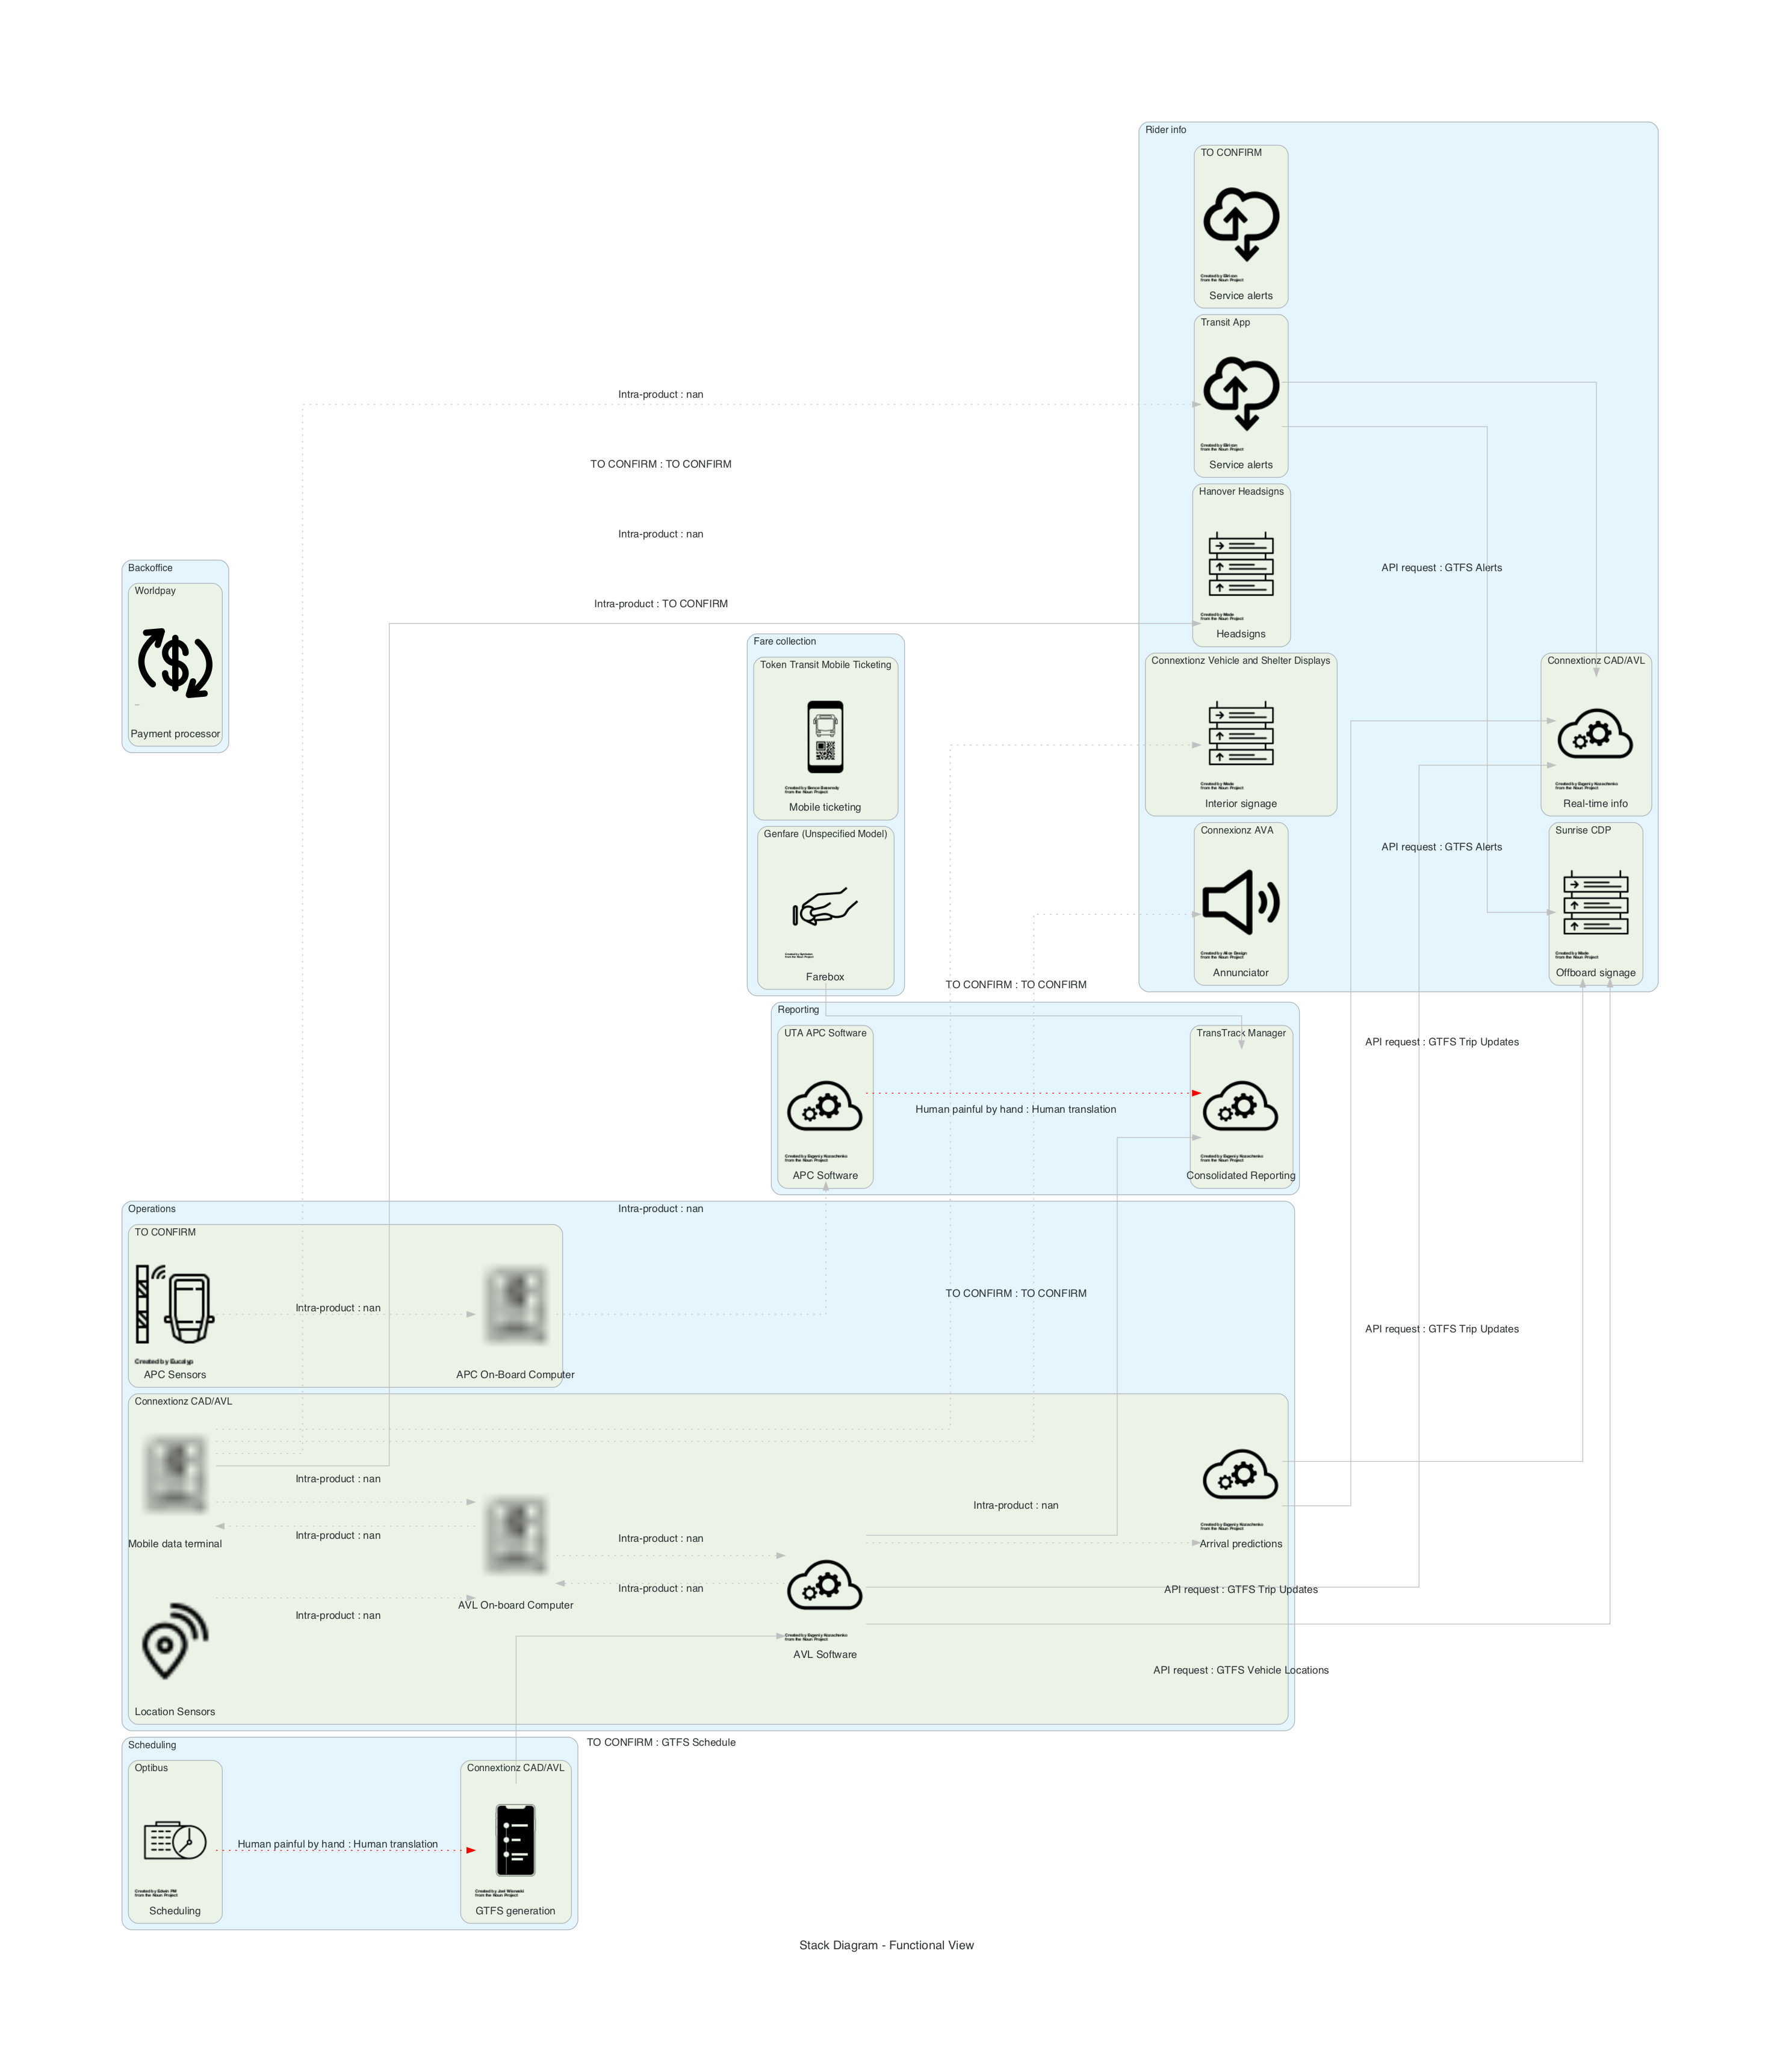

In [92]:
my_stack = ts.stack.Stack(stack_dict)

LEVEL1 = "Function Group"
LEVEL2 = "Product"

d = ts.stack.stack_diagram(
    my_stack,
    cluster_level_1 = LEVEL1,
    cluster_level_2 = LEVEL2,
)

d


In [34]:
ts.stack

<module 'transitstacks.stack' from '/Users/elizabeth/Documents/urbanlabs/CA Interoperable/working/Transitstacks/transitstacks/stack.py'>